# CS189/289A Spring 2017 Homework 1
## Yicheng Chen
## SID: 26943685
## Kaggle name/email: Eason Chen/chenyc15@berkeley.edu

### README
This notebook includes all the code I wrote for homework 1. 

*Python version is 3.5.2.*

- How to use

    To reproduce the results, 
    
    Please put this notebook and the **hw01_data** folder together 
    
    And put the **spam_data_BOW_validation.mat** in hw01_data/spam (along with the orignal spam_data.mat)
    

- Dependencies

    This notebook uses the following packages: 

Import all the required packages first.

In [3]:
%matplotlib inline
import scipy.io
import random
from random import shuffle
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from scipy.sparse import vstack

pathname = 'hw01_data/' # the data path is in same directory with this notebook

### Problem 1
Rarely will you receive “training” data and “validation” data; you will have to partition a validation set yourself. For the MNIST dataset, set aside 10,000 training images as a validation set. For the spam dataset, set aside 20% training samples as a validation set. For the CIFAR-10 dataset, set aside 5,000 training images as a validation set. Be sure to shuffle your data before splitting it to make sure all classes are represented in your partitions.

*Target: Splitting the dataset(MNIST, spam and CIFAR-10) into training set and validation set.*

In [4]:
# MNIST
mnist = scipy.io.loadmat(pathname + 'mnist/train.mat')
shuffle(mnist['trainX'])
mnist['validationX'] = mnist['trainX'][:10000]
mnist['trainX'] = mnist['trainX'][10000:]
scipy.io.savemat(pathname + 'mnist/train_new.mat', mnist, do_compression=True)

# SPAM
spam = scipy.io.loadmat(pathname + 'spam/spam_data.mat')
training_data_size = spam['training_data'].shape[0]
validation_idx = random.sample(range(0, training_data_size), int(0.2*training_data_size))
training_idx = list(set(validation_idx)^set(range(0, training_data_size)))
validation_data = spam['training_data'][validation_idx]
validation_labels = spam['training_labels'][0][validation_idx]
training_data = spam['training_data'][training_idx]
training_labels = spam['training_labels'][0][training_idx]
spam['validation_data'] = validation_data
spam['validation_labels'] = validation_labels
spam['training_data'] = training_data
spam['training_labels'] = training_labels
scipy.io.savemat(pathname + 'spam/spam_data_validation.mat', spam, do_compression=True)

# CIFAR
cifar = scipy.io.loadmat(pathname + 'cifar/train.mat')
shuffle(cifar['trainX'])
cifar['validationX'] = cifar['trainX'][:5000]
cifar['trainX'] = cifar['trainX'][5000:]
scipy.io.savemat(pathname + 'cifar/train_new.mat', cifar, do_compression=True)

### Problem 2
Train a linear SVM on all three datasets. Plot the error rate on the training and validation sets versus the number of training examples that you used to train your classifier. The number of training examples in your experiment should be 100, 200, 500, 1,000, 2,000, 5,000, and 10,000.
1. For the MNIST dataset, use raw pixels as features. At this stage, you should expect accura- cies between 70% and 90%.
2. For the spam dataset, use the provided word frequencies as features. In other words, each document is represented by a vector, where the ith entry denotes the number of times word i (as specified in featurize.py) is found in that document. At this stage, you should expect accuracies between 70% and 90%.
3. For the CIFAR-10 dataset, use raw pixels as features. At this stage, you should expect accuracies between 25% and 35%. A warning that training SVMs for CIFAR-10 takes a couple minutes to run as the number of training examples increases. As such, you only need to train SVMs for 100, 200, 500, 1,000, 2,000, and 5,000 examples (not 10,000).
We found that SVC(kernel=’linear’) was faster than LinearSVC.

*Target: Build simple linear SVM classifiers for dataset with acceptable validation accuracies.*

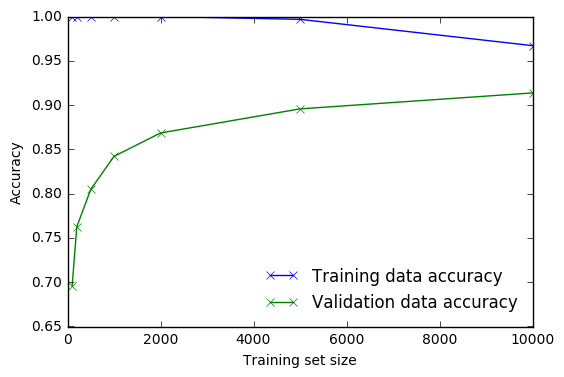

In [5]:
#MNIST
mnist = scipy.io.loadmat(pathname + 'mnist/train_new.mat')
all_training_accuracy = []
all_validation_accuracy = []
all_training_size = [100, 200, 500, 1000, 2000, 5000, 10000]
for size in all_training_size:
	training_data = mnist['trainX'][:size, :-1]
	training_labels = mnist['trainX'][:size, -1:].ravel()
	validation_data = mnist['validationX'][:, :-1]
	validation_labels = mnist['validationX'][:, -1:].ravel()
	clf = svm.LinearSVC()
	clf.fit(training_data, training_labels)
	training_accuracy = clf.score(training_data, training_labels)
	validation_accuracy = clf.score(validation_data, validation_labels)
	all_training_accuracy.append(training_accuracy)
	all_validation_accuracy.append(validation_accuracy)
plt.plot(all_training_size, all_training_accuracy, label='Training data accuracy', marker='x')
plt.plot(all_training_size, all_validation_accuracy, label='Validation data accuracy', marker='x')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', frameon=False)
plt.show()

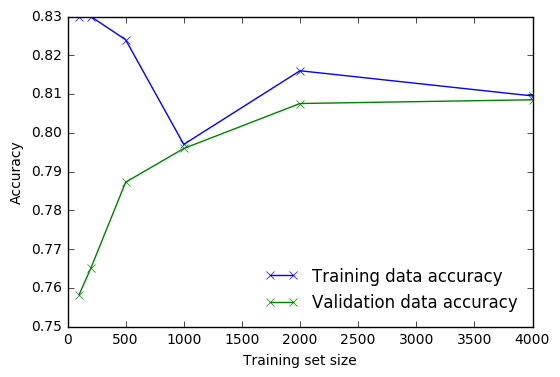

In [6]:
spam = scipy.io.loadmat(pathname + 'spam/spam_data_validation.mat')
all_training_accuracy = []
all_validation_accuracy = []
all_training_size = [100, 200, 500, 1000, 2000, 4000]
for size in all_training_size:
	idx = random.sample(range(0, len(spam['training_data'])), size)
	training_data = spam['training_data'][idx, :]
	training_labels = spam['training_labels'].ravel()[idx]
	validation_data = spam['validation_data']
	validation_labels = spam['validation_labels'].ravel()
	clf = svm.LinearSVC()
	clf.fit(training_data, training_labels)
	training_accuracy = clf.score(training_data, training_labels)
	validation_accuracy = clf.score(validation_data, validation_labels)
	all_training_accuracy.append(training_accuracy)
	all_validation_accuracy.append(validation_accuracy)
plt.plot(all_training_size, all_training_accuracy, label='Training data accuracy', marker='x')
plt.plot(all_training_size, all_validation_accuracy, label='Validation data accuracy', marker='x')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', frameon=False)
plt.show()

Trained:  100
Trained:  200
Trained:  500
Trained:  1000
Trained:  2000
Trained:  5000


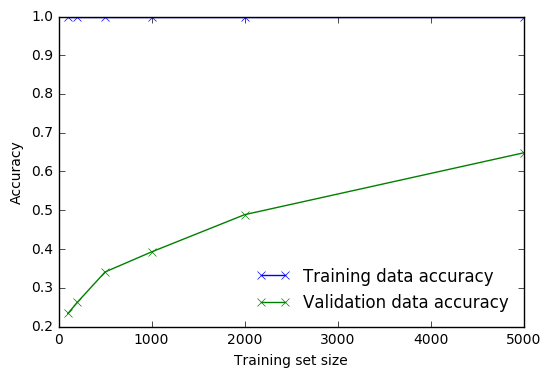

In [7]:
cifar = scipy.io.loadmat(pathname + 'cifar/train_new.mat')
all_training_accuracy = []
all_validation_accuracy = []
all_training_size = [100, 200, 500, 1000, 2000, 5000]
for size in all_training_size:
    training_data = cifar['trainX'][:size, :-1]
    training_labels = cifar['trainX'][:size, -1:].ravel()
    validation_data = cifar['validationX'][:, :-1]
    validation_labels = cifar['validationX'][:, -1:].ravel()
    clf = svm.SVC(kernel='linear') # This might be faster than LinearSVC?
    clf.fit(training_data, training_labels)
    training_accuracy = clf.score(training_data, training_labels)
    validation_accuracy = clf.score(validation_data, validation_labels)
    all_training_accuracy.append(training_accuracy)
    all_validation_accuracy.append(validation_accuracy)
    print('Trained: ', size)
plt.plot(all_training_size, all_training_accuracy, label='Training data accuracy', marker='x')
plt.plot(all_training_size, all_validation_accuracy, label='Validation data accuracy', marker='x')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', frameon=False)
plt.show()

### Problem 3
For the MNIST dataset, find the best C value. In your report, list the best C value, the C values you tried, and the corresponding accuracies. As in the previous problem, you need only train on up to 10,000 examples for performance reasons.

*Target: Try different C values to get the optimal hyperparameter for MNIST dataset.*

In [ ]:
mnist = scipy.io.loadmat(pathname + 'mnist/train_new.mat')
all_training_accuracy = []
all_validation_accuracy = []
size = 5000
all_C = list(range(1, 100)) # all the C values that are tested, might take a few minutes to run
validation_data = mnist['validationX'][:, :-1]
validation_labels = mnist['validationX'][:, -1:].ravel()
training_data = mnist['trainX'][:size, :-1]
training_labels = mnist['trainX'][:size, -1:].ravel()
for C in all_C:
	clf = svm.LinearSVC(C=C) # try linear or non-linear kernels
	clf.fit(training_data, training_labels)
	training_accuracy = clf.score(training_data, training_labels)
	validation_accuracy = clf.score(validation_data, validation_labels)
	all_training_accuracy.append(training_accuracy)
	all_validation_accuracy.append(validation_accuracy)
	print("C=", C, ": ", validation_accuracy)

In [9]:
max_idx = all_validation_accuracy.index(max(all_validation_accuracy))
print("***The C that gives maximum accuracy: ", all_C[max_idx])
print("***Accuracy: ", max(all_validation_accuracy))

***The C that gives maximum accuracy:  39
***Accuracy:  0.8972


### Problem 4
For the spam dataset, use k-fold cross validation to find and report the best C value. Use k = 5. In your report, list the best C value, the C values you tried, and the corresponding accuracies.

*Target: Use 5-fold cross validation to find the best C for spam dataset.*

In [10]:
# This is a helper function to divide a set into k roughly equal size sets
def k_partition(seq, k):
	avg = len(seq) / float(k)
	out = []
	last = 0.0
	while last < len(seq):
		out.append(seq[int(last):int(last + avg)])
		last += avg
	return out

In [11]:
spam = scipy.io.loadmat(pathname + 'spam/spam_data_validation.mat')
all_validation_accuracy = []
all_C = list(range(1, 100))
all_training_data = spam['training_data']
all_training_labels = spam['training_labels'].ravel()

idx = list(range(0,all_training_data.shape[0]))
random.shuffle(idx)

k = 5
idx_k = k_partition(idx, k)

for C in all_C:
	k_accuracy = []
	for i in range(0, k):
		validation_idx = idx_k[i]
		training_idx = list(set(validation_idx)^set(idx))
		training_data = all_training_data[training_idx]
		training_labels = all_training_labels[training_idx]
		validation_data = all_training_data[validation_idx]
		validation_labels = all_training_labels[validation_idx]
		clf = svm.LinearSVC(C=C)
		clf.fit(training_data, training_labels)
		k_accuracy.append(clf.score(validation_data, validation_labels))
	print("C=", C, "--Average accuracy: ", sum(k_accuracy)/float(k))
	all_validation_accuracy.append(sum(k_accuracy)/float(k))

C= 1 --Average accuracy:  0.804000549101
C= 2 --Average accuracy:  0.804485393337
C= 3 --Average accuracy:  0.80666105883
C= 4 --Average accuracy:  0.806661350905
C= 5 --Average accuracy:  0.807628410704
C= 6 --Average accuracy:  0.807144442692
C= 7 --Average accuracy:  0.803517165238
C= 8 --Average accuracy:  0.807869664523
C= 9 --Average accuracy:  0.802072855148
C= 10 --Average accuracy:  0.808594886354
C= 11 --Average accuracy:  0.809077978141
C= 12 --Average accuracy:  0.809803199972
C= 13 --Average accuracy:  0.808353048385
C= 14 --Average accuracy:  0.809803199972
C= 15 --Average accuracy:  0.809078270216
C= 16 --Average accuracy:  0.808111794566
C= 17 --Average accuracy:  0.810529005952
C= 18 --Average accuracy:  0.809560485779
C= 19 --Average accuracy:  0.81173790372
C= 20 --Average accuracy:  0.805936713223
C= 21 --Average accuracy:  0.810769091472
C= 22 --Average accuracy:  0.806902604723
C= 23 --Average accuracy:  0.805210323093
C= 24 --Average accuracy:  0.804967900975
C= 

In [12]:
max_idx = all_validation_accuracy.index(max(all_validation_accuracy))
print("***The C that gives maximum accuracy: ", all_C[max_idx])
print("***Accuracy: ", max(all_validation_accuracy))

***The C that gives maximum accuracy:  63
***Accuracy:  0.817059215253


### Problem 5
Using the best model you trained for each dataset, generate predictions for the test sets we provide and save those predictions to .csv files. Upload your predictions to the Kaggle leaderboards (details on Piazza). In your report, include your Kaggle name as it displays on the leaderboard and your Kaggle score for each of the three datasets.

*Target: Get as high ranking as possible in Kaggle leaderboards!*

#### MNIST dataset
To get better performance, the HOG feature is calculated for MNIST dataset and is used together with the original pixel value as a combined feature in SVM training. First we calculated the feature and store them in a new .mat file. Then the tunning process is repeated on the newly constructed feature to search for optimal C value. And finally we will train the SVM model and make prediction for the test set using all the training data and validation data.

In [13]:
#Calculate the HOG feature
def hog_feature(feature):
	image = feature.reshape(28, 28)
	fd, hog_image = hog(image, orientations=8, pixels_per_cell=(6, 6),
                    cells_per_block=(1, 1), visualise=True)
	return hog_image.ravel()

In [14]:
# Might take a few minutes to run
mnist = scipy.io.loadmat(pathname + 'mnist/train_new.mat')
validation_data = mnist['validationX'][:, :-1]
for i in range(0, len(validation_data)):
	validation_data[i] = hog_feature(validation_data[i])
print("Validation Set HOG finished.")
training_data = mnist['trainX'][:, :-1]
for i in range(0, len(training_data)):
	training_data[i] = hog_feature(training_data[i])
print("Training Set HOG finished.")
mnist['trainX'][:, :-1] = training_data
mnist['validationX'][:, :-1] = validation_data
scipy.io.savemat(pathname + 'mnist/train_hog66.mat', mnist, do_compression=True)

# Calculate the HOG feature of test set data
test = scipy.io.loadmat(pathname + 'mnist/test.mat')
test_data = test['testX']
for i in range(0, len(test_data)):
	test_data[i] = hog_feature(test_data[i])
print("Test Set HOG finished.")
test['testX'] = test_data
scipy.io.savemat(pathname + 'mnist/test_hog66.mat', test, do_compression=True)

Validation Set HOG finished.
Training Set HOG finished.
Test Set HOG finished.


In [15]:
pathname = 'hw01_data/'
mnist = scipy.io.loadmat(pathname + 'mnist/train_new.mat')
mnist_hog = scipy.io.loadmat(pathname + 'mnist/train_hog66.mat')
test = scipy.io.loadmat(pathname + 'mnist/test.mat')
test_hog = scipy.io.loadmat(pathname + 'mnist/test_hog66.mat')

trainX = np.concatenate((mnist_hog['trainX'][:, :-1], mnist['trainX']), axis=1)
validationX = np.concatenate((mnist_hog['validationX'][:, :-1], mnist['validationX']), axis=1)
allX = np.concatenate((trainX, validationX), axis=0)
training_data = allX[:, :-1]
training_labels = allX[:, -1:].ravel()
test_data = np.concatenate((test_hog['testX'], test['testX']), axis=1)
C = 40 # From the new tunning

clf = svm.LinearSVC(C=C)
clf.fit(training_data, training_labels)
test_predict = clf.predict(test_data)

# save predict output to mnist_kaggle.csv
f = open('mnist_kaggle.csv', 'w')
f.write('Id,Category\n')
for i in range(0, len(test_data)):
	s = str(i)+','+str(test_predict[i])+'\n'
	f.write(s)
f.close()
print('test prediction saved')

test prediction saved


#### Spam dataset
For the Spam dataset, the bag-of-words feature is calculated. To do that, the feature.py is modified to do a two-pass process: in the first pass, scan all the spam/ham documents and record all words that appeared. And during the second pass, we count the file length normalized word frequency in each spam/ham/test document and use that long vector as the feature of each document. The final feature size is about 50,000, which requires a sparse style matrix representation. Fortunately, scikit-learn supports sparse matrix dataset and we can use that directly to train the model as well as predict the test set.

Note: The bag-of-words feature takes about 2 hours to run. Here the modified feature.py is not included and please use the uploaded **spam_data_BOW_validation.mat**.

In [16]:
pathname = 'hw01_data/'
spam = scipy.io.loadmat(pathname + 'spam/spam_data_BOW_validation.mat')
C = 50 # from cross validation experiment

In [18]:
training_data = vstack([spam['training_data'], spam['validation_data']])
training_labels = np.append(spam['training_labels'].ravel(), spam['validation_labels'].ravel())
test_data = spam['test_data']
clf = svm.LinearSVC(C=C)
clf.fit(training_data, training_labels)
test_predict = clf.predict(test_data)
# save output file to spam_kaggle.csv
f = open('spam_kaggle.csv', 'w')
f.write('Id,Category\n')
for i in range(0, len(test_predict)):
	s = str(i)+','+str(test_predict[i])+'\n'
	f.write(s)
f.close()
print('test prediction saved')

test prediction saved


## ------------------- Kaggle score ----------------
### MNIST: 0.96000
### Spam: 0.92452